In [2]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib.inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
from warnings import filterwarnings
filterwarnings("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


data processing

In [3]:
df=pd.read_csv("bangalore Home Prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1=df.drop(["area_type","availability","balcony","society"],axis=1)

In [8]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df1["BHK"]=df1["size"].astype(str).apply(lambda x: x.split(" ")[0])

In [10]:
df1

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [11]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
BHK            0
dtype: int64

In [12]:
df2=df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [13]:
df2.groupby("location")["location"].agg("count")

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1304, dtype: int64

In [14]:
df1

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df1[~df1["total_sqft"].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13240,Devanahalli,1 BHK,1020 - 1130,NaN,52.570,1
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [17]:
def convert_total_sqft_to_num(x):
    token=x.split("-")
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df2=df1.copy()
df2["total_sqft"]=df2["total_sqft"].apply(convert_total_sqft_to_num)

In [19]:
df2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [20]:
df2.iloc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [21]:
df2["price_per_sqft"]=(df2["price"]*100000/df2["total_sqft"])

In [22]:
df3=df2.copy()

In [23]:
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [24]:
df3.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df3.location.unique())

1306

In [26]:
df3["location"]=df3["location"].astype(str).apply(lambda x: x.strip(""))

In [27]:
df4=df3.dropna()
df4.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [28]:
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [29]:
location_stats=df4.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [30]:
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1299, dtype: int64

In [31]:
location_stats_less_10 = location_stats[location_stats<=10]
len(location_stats_less_10)

1059

In [32]:
len(df4.location.unique())

1299

In [33]:
df4["location"]=df4["location"].apply(lambda x: "other" if x in location_stats_less_10 else x)

C:\Users\jayaprakash\AppData\Local\Temp\ipykernel_12500\1576430091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["location"]=df4["location"].apply(lambda x: "other" if x in location_stats_less_10 else x)


In [34]:
len(df4["location"].value_counts())

241

In [36]:
df4["price_per_sqft"].describe()

count    1.320100e+04
mean     7.920566e+03
std      1.067231e+05
min      2.678298e+02
25%      4.267782e+03
50%      5.438066e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [37]:
# Assuming df4 is your DataFrame
df4["total_sqft"] = pd.to_numeric(df4["total_sqft"], errors='coerce')
df4["BHK"] = pd.to_numeric(df4["BHK"], errors='coerce')

# Filter the DataFrame based on the condition
df4[df4["total_sqft"] / df4["BHK"] < 300].head()

# Display the first few rows of the filtered DataFrame


C:\Users\jayaprakash\AppData\Local\Temp\ipykernel_12500\1789270101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["total_sqft"] = pd.to_numeric(df4["total_sqft"], errors='coerce')
C:\Users\jayaprakash\AppData\Local\Temp\ipykernel_12500\1789270101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["BHK"] = pd.to_numeric(df4["BHK"], errors='coerce')


,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df4.shape

(13201, 7)

In [39]:
df5=df4[~(df4["total_sqft"] / df4["BHK"] < 300)]

In [40]:
df5.shape

(12457, 7)

In [41]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby("location"):
        mean=np.mean(subdf.price_per_sqft)
        std=np.std(subdf.price_per_sqft)
        reduce_df=subdf[(subdf.price_per_sqft>(mean-std))&(subdf.price_per_sqft<=(mean+std))]
        df_out=pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out
df6=remove_pps_outliers(df5)
df6.shape

(10246, 7)

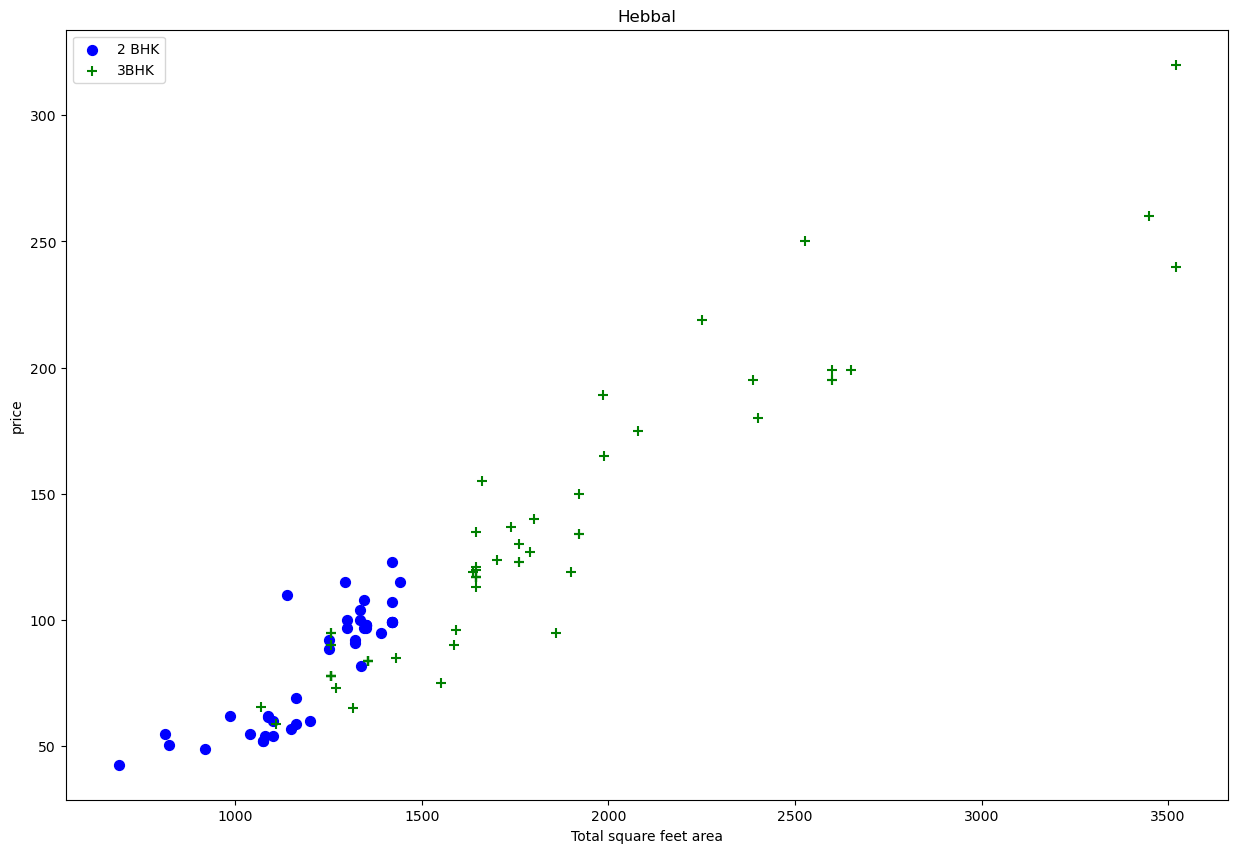

In [42]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    matplotlib.rcParams["figure.figsize"]=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color="Blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3BHK",s=50)
    plt.xlabel("Total square feet area")
    plt.ylabel("price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Hebbal")

In [43]:
df6.shape

(10246, 7)

In [44]:
import numpy as np

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        BHK_stats = {}
        for BHK, BHK_df in location_df.groupby("BHK"):
            BHK_stats[BHK] = {
                "mean": np.mean(BHK_df["price_per_sqft"]),
                "std": np.std(BHK_df["price_per_sqft"]),
                "count": BHK_df.shape[0]
            }
    
    for BHK, BHK_df in location_df.groupby("BHK"):
        stats = BHK_stats.get(BHK - 1)
        if stats and stats["count"] > 5:
            exclude_indices = np.append(exclude_indices, BHK_df[BHK_df["price_per_sqft"] < stats["mean"]].index.values)
    
    return df.drop(exclude_indices, axis="index")    

df7 = remove_bhk_outliers(df6)
df7.shape


(9082, 7)

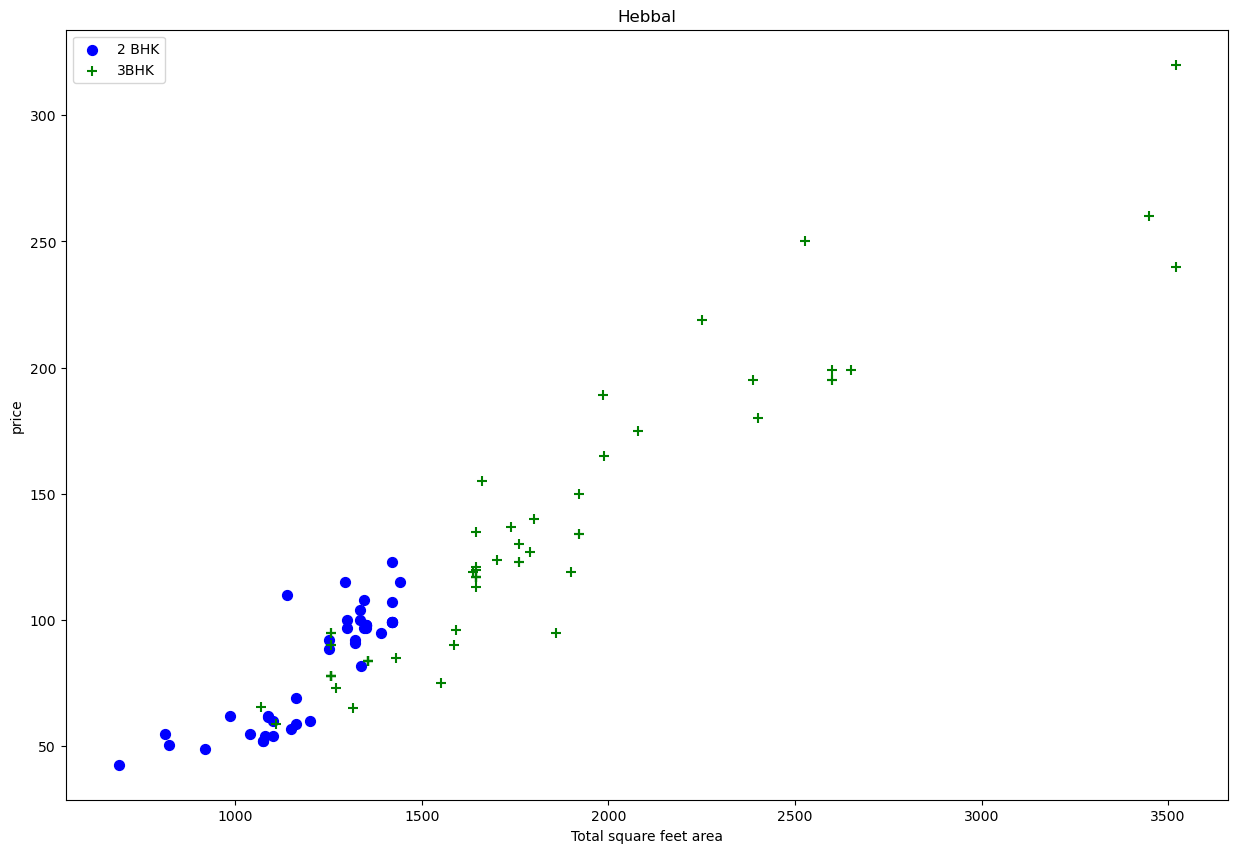

In [45]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'count')

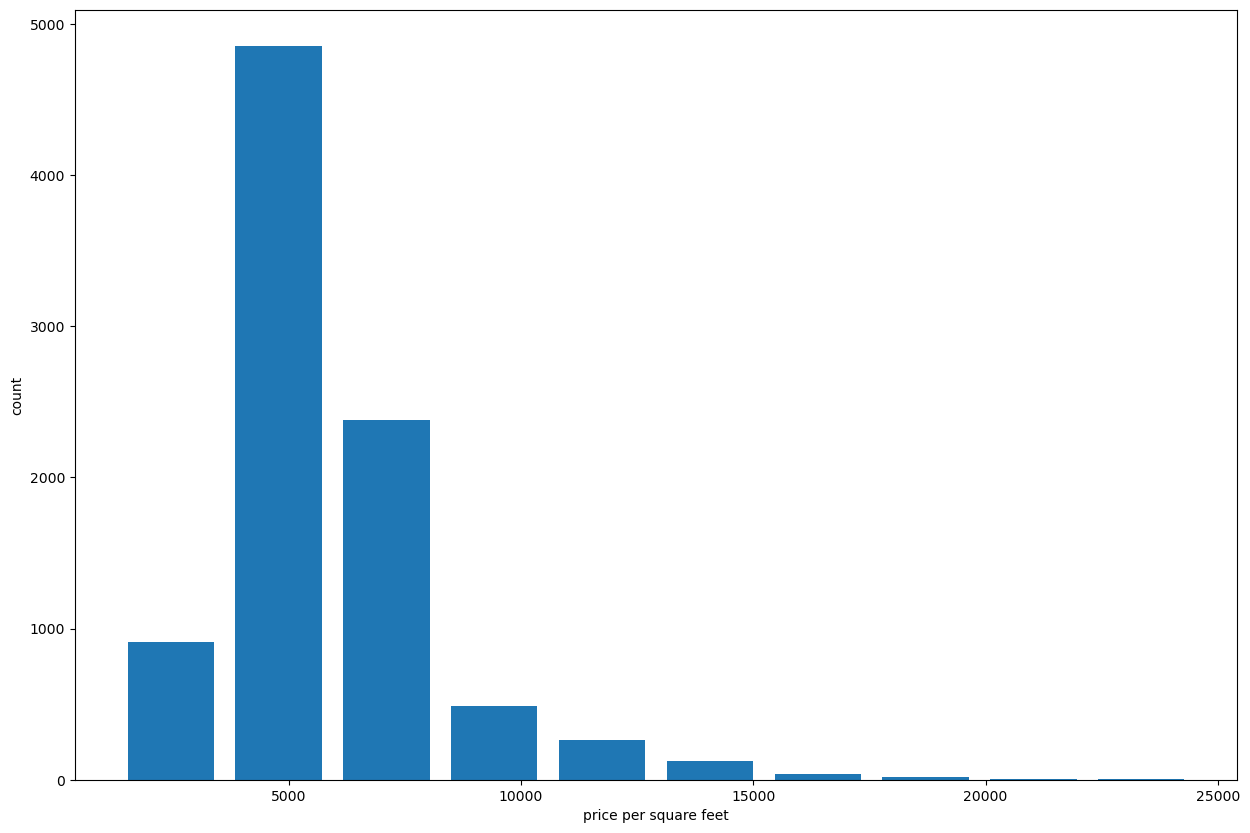

In [46]:
plt.figure(figsize=(15,10))
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [47]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8479,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8568,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9640,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

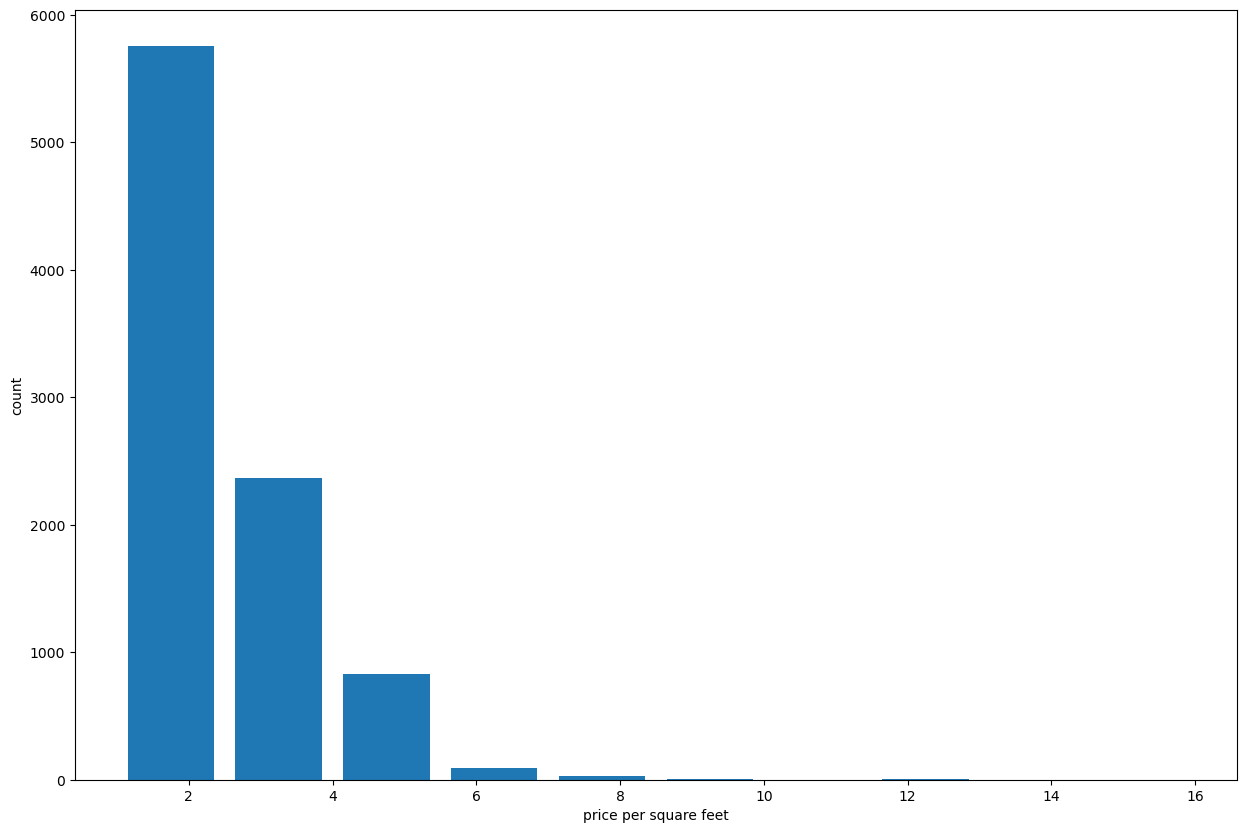

In [49]:
plt.figure(figsize=(15,10))
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [50]:
df8=df7.drop(["size","price_per_sqft"],axis="columns")

In [51]:
df8.head()

,location,total_sqft,bath,price,BHK
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


In [52]:
 df8[df8.bath>df8.BHK+2]

,location,total_sqft,bath,price,BHK
1637,Chikkabanavar,2460.0,7.0,80.0,4
5232,Nagasandra,7000.0,8.0,450.0,4
6702,Thanisandra,1806.0,6.0,116.0,3
8403,other,11338.0,9.0,1000.0,6


In [53]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(8992, 5)

In [54]:
dummies=pd.get_dummies(df9.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
df10=pd.concat([df9,dummies.drop('other',axis="columns")],axis="columns")
df10.head()


,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,44.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df11=df10.drop("location",axis="columns")
df11.head(2)

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,44.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df11.shape

(8992, 244)

In [58]:
X=df11.drop("price",axis="columns")
X.head()

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
y=df11.price
y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.32,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8044964593355549

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5,test_size=0.3, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83784982, 0.83798883, 0.79916697, 0.84038986, 0.82658915])

In [64]:
def predicted_price(location, sqft, bath, BHK):
    loc_index = np.where(X.columns == location)[0][0]
    features = np.zeros(len(X.columns))
    features[0] = sqft
    features[1] = bath
    features[2] = BHK
    if loc_index >= 0:
        features[loc_index] = 1
    return lr_clf.predict([features])[0]

predicted_price("1st Phase JP Nagar", 1000, 2, 2)


C:\Users\jayaprakash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.47466396318461

In [66]:
def predicted_price(location, sqft, bath, BHK):
    loc_index = np.where(X.columns == location)[0][0]
    features = np.zeros(len(X.columns))
    features[0] = sqft
    features[1] = bath
    features[2] = BHK
    if loc_index >= 0:
        features[loc_index] = 1
    return lr_clf.predict([features])[0]

predicted_price("1st Phase JP Nagar", 1000, 3, 3)

C:\Users\jayaprakash\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.79755420817354